# Study Case verification

description

## Verification 1. Garne Site - Colombia

### Inputs

In [1]:
H = 25 # Aquifer Height
Q = 1.2 #Pumping rate L/s
d = 30 #Distance from the river
k = 2.3e-5 #K m/s
poro = 0.3
h0 = 24 #River head


## Create Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import model_proposal #AEM model location
import solvers #Solvers for some analysis from the aem model

# Define model with hydraulic condutivity = 3 m/d, height = 20, reference river head = 18

aem_model = model_proposal.Model(k = k*3600*24, H = H, h0 = h0)

aem_model.Qo_x = 0.5

# Add well at position x = d, y = 50 and pumping rate of 1.2 L/s, well radius = 0.1

well = model_proposal.Well(aem_model, Q = Q*1e-3*3600*24, rw = 0.1, x = d, y = 50)

# Solver for river length and river water capture fraction.

solv = solvers.river_length(aem_model)

print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

length, riv_coords, capture_fraction = solv.solve_river_length()

tt = solv.time_travel(poro)

-0.09132421054257657
River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


In [3]:
riv_coords

[17.134484030033477, 82.86551596996652]

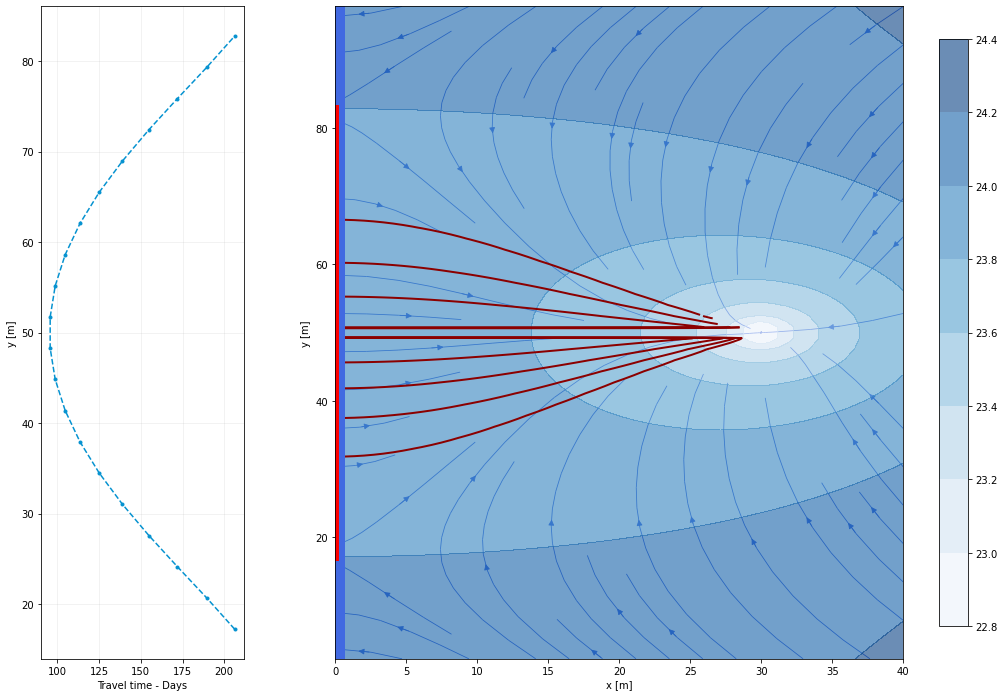

In [4]:
import plot

img = plot.plotting(0,40,riv_coords,60)

img.plot2d(aem_model, tt=tt,levels=8, quiver=False, streams=True)

plt.savefig('case_study0.png', dpi = 400)

## Step 2. Compare results

In [5]:
#Portion of River Filtrate (from the paper)
# 10 - 24 %


![Results Published for River Filtrate Portion](pictures_notebook/table_filtrate.png)

In [6]:
print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


In [7]:
# Define model with hydraulic condutivity = 3 m/d, height = 20, reference river head = 18

aem_model = model_proposal.Model(k = k*3600*24, H = H, h0 = h0)

aem_model.Qo_x = 0.5

# Add well at position x = d, y = 50 and pumping rate of 1.2 L/s, well radius = 0.1

well = model_proposal.Well(aem_model, Q = 1.2*1e-3*3600*24, rw = 0.1, x = d, y = 50)

# Solver for river length and river water capture fraction.

solv = solvers.river_length(aem_model)

print("River Capture Length, Capture position and contribution to discharge is:")
print(solv.solve_river_length())

length, riv_coords, capture_fraction = solv.solve_river_length()

#tt = solv.time_travel(poro)

River Capture Length, Capture position and contribution to discharge is:
(65.73103193993305, [17.134484030033477, 82.86551596996652], 0.21200819795420453)


## Verification 2. Loessnitztal River - Germany